In [1]:
# to use dataframes
import pandas as pd
#to use np arrays
import numpy as np

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

#For date-time
from datetime import datetime
from datetime import timedelta
import math


In [2]:
train_df = pd.read_csv('train.csv.zip')
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [3]:
test_df = pd.read_csv('test.csv.zip')
test_df

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [4]:
df_store = pd.read_csv('stores.csv') #store data
df_train = pd.read_csv('train.csv.zip') # train set
df_features = pd.read_csv('features.csv.zip') #external information

In [5]:
df_store.head()


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
df_train.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
df_features.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
# Merge the three datasets on a common column
merged_df = pd.merge(df_store, df_train, on='Store')
merged_df = pd.merge(merged_df, df_features, on=['Store', 'Date'])

# Display the merged dataset
print(merged_df.head())

   Store Type    Size  Dept        Date  Weekly_Sales  IsHoliday_x  \
0      1    A  151315     1  2010-02-05      24924.50        False   
1      1    A  151315     2  2010-02-05      50605.27        False   
2      1    A  151315     3  2010-02-05      13740.12        False   
3      1    A  151315     4  2010-02-05      39954.04        False   
4      1    A  151315     5  2010-02-05      32229.38        False   

   Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0        42.31       2.572        NaN        NaN        NaN        NaN   
1        42.31       2.572        NaN        NaN        NaN        NaN   
2        42.31       2.572        NaN        NaN        NaN        NaN   
3        42.31       2.572        NaN        NaN        NaN        NaN   
4        42.31       2.572        NaN        NaN        NaN        NaN   

   MarkDown5         CPI  Unemployment  IsHoliday_y  
0        NaN  211.096358         8.106        False  
1        NaN  211.096358  

In [9]:
merged_df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [10]:
class DataUnderstanding(object):
    """This is a class that does basic data understanding"""
    def __init__(self, df):
        self.shape = df.shape
        self.info = df.info
        self.duplicates = df.duplicated().sum()
        self.missing = df.isna().sum()
        self.types = df.dtypes

In [11]:
#instantiating the classes
dataund= DataUnderstanding(merged_df)

In [12]:
#Getting the shape of the dataset
print(f"shape:{dataund.shape}")

shape:(421570, 17)


In [13]:
#getting the info of the data
print(dataund.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  int64  
 3   Dept          421570 non-null  int64  
 4   Date          421570 non-null  object 
 5   Weekly_Sales  421570 non-null  float64
 6   IsHoliday_x   421570 non-null  bool   
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
 16  IsHoliday_y   421570 non-null  bool   
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [14]:
#getting the missing values
dataund.missing

Store                0
Type                 0
Size                 0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

In [15]:
#checking the data types
dataund.types

Store             int64
Type             object
Size              int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday_x        bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday_y        bool
dtype: object

There are integers, floats, bools, objects

In [16]:
#checking for duplicates
print(f"Duplictes:{dataund.duplicates.sum()}")

Duplictes:0


There are no duplicates

### Data Preparation

##### Validity


In [17]:
#Removing duplicated column
merged_df.drop(['IsHoliday_y'], axis=1, inplace=True)

In [18]:
#rename column
merged_df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)

In [19]:
#last ready set
merged_df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,A,151315,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,A,151315,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,A,151315,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,A,151315,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [20]:
## Handdling Date features
## Extracting day,montha nd year from Date
merged_df['Day']=pd.DatetimeIndex(merged_df['Date']).day
merged_df['Month']=pd.DatetimeIndex(merged_df['Date']).month
merged_df['Year']=pd.DatetimeIndex(merged_df['Date']).year

In [21]:
merged_df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Month,Year
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
1,1,A,151315,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
2,1,A,151315,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
3,1,A,151315,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
4,1,A,151315,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010


In [22]:
merged_df['Date'].head(5).append(merged_df['Date'].tail(5)) # to see first and last 5 rows.

<ipython-input-22-f172b947f88b>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df['Date'].head(5).append(merged_df['Date'].tail(5)) # to see first and last 5 rows.


0         2010-02-05
1         2010-02-05
2         2010-02-05
3         2010-02-05
4         2010-02-05
421565    2012-10-26
421566    2012-10-26
421567    2012-10-26
421568    2012-10-26
421569    2012-10-26
Name: Date, dtype: object

Our data is from 5th of February 2010 to 26th of October 2012.


### Completeness

In [23]:
#Filling null's with 0
merged_df = merged_df.fillna(0)

In [24]:
#checking the null values
merged_df.isna().sum()

Store           0
Type            0
Size            0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Day             0
Month           0
Year            0
dtype: int64

#### IsHoliday Column

In [25]:
df_holiday = merged_df.loc[merged_df['IsHoliday']==True]
df_holiday['Date'].unique() 

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

There are 10 holidays

In [26]:
df_not_holiday = merged_df.loc[merged_df['IsHoliday']==False]
df_not_holiday['Date'].nunique() 

133

There are 133 days for non Holiday

There are 4 holiday values such as;

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

After the 07-Sep-2012 holidays are in test set for prediction. When we look at the data, average weekly sales for holidays are significantly higher than not-holiday days. In train data, there are 133 weeks for non-holiday and 10 weeks for holiday.

In [27]:
# Super bowl dates in train set
merged_df.loc[(merged_df['Date'] == '2010-02-12')|(merged_df['Date'] == '2011-02-11')|(merged_df['Date'] == '2012-02-10'),'Super_Bowl'] = True
merged_df.loc[(merged_df['Date'] != '2010-02-12')&(merged_df['Date'] != '2011-02-11')&(merged_df['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [28]:
# Labor day dates in train set
merged_df.loc[(merged_df['Date'] == '2010-09-10')|(merged_df['Date'] == '2011-09-09')|(merged_df['Date'] == '2012-09-07'),'Labor_Day'] = True
merged_df.loc[(merged_df['Date'] != '2010-09-10')&(merged_df['Date'] != '2011-09-09')&(merged_df['Date'] != '2012-09-07'),'Labor_Day'] = False

In [29]:
# Thanksgiving dates in train set
merged_df.loc[(merged_df['Date'] == '2010-11-26')|(merged_df['Date'] == '2011-11-25'),'Thanksgiving'] = True
merged_df.loc[(merged_df['Date'] != '2010-11-26')&(merged_df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [30]:
#Christmas dates in train set
merged_df.loc[(merged_df['Date'] == '2010-12-31')|(merged_df['Date'] == '2011-12-30'),'Christmas'] = True
merged_df.loc[(merged_df['Date'] != '2010-12-31')&(merged_df['Date'] != '2011-12-30'),'Christmas'] = False

### Exploratory Data Analysis

#### Univariate Analysis

The number of data points in the temperature variable is 421,570.
The average temperature in the dataset is approximately 60.09 degrees.
The temperature values in the dataset are quite spread out, with a standard deviation of 18.45 degrees. This indicates that there is a significant amount of variability in the temperature data.
The smallest temperature value in the dataset is -2.06 degrees.
25% of the temperature values in the dataset are less than or equal to 46.68 degrees.
Half of the temperature values in the dataset are less than or equal to 62.09 degrees.
75% of the temperature values in the dataset are less than or equal to 74.28 degrees.
The largest temperature value in the dataset is 100.14 degrees.

In [32]:
class UnivariateAnalysis(object):
        def __init__(self, data):
           self.data = data
        def histplot(self, col):
                plt.figure(figsize=(15, 5))
                sns.histplot(data=self.data, x=col, kde=True)
                plt.title(f"{col} Distribution")
                plt.show()
        def countplot(self, col):
                plt.figure(figsize=(15, 5))
                sns.countplot(data=self.data, x=col)
                plt.title(f"{col} Countplot")
                plt.show()
        def boxplot(self, col):
                plt.figure(figsize=(15, 5))
                sns.boxplot(data=self.data, x=col)
                plt.title(f"{col} Boxplot")
                plt.show()
        def barplot(self, col):
                plt.figure(figsize=(15, 5))
                sns.barplot(data=self.data, x=col, y=self.data.index)
                plt.title(f"{col} Barplot")
                plt.show()
                print(self.data[col].describe())

In [33]:
eda=UnivariateAnalysis(merged_df)

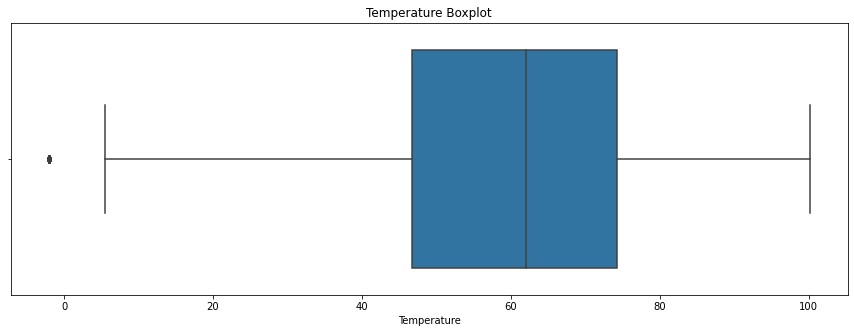

In [34]:
eda.boxplot('Temperature')

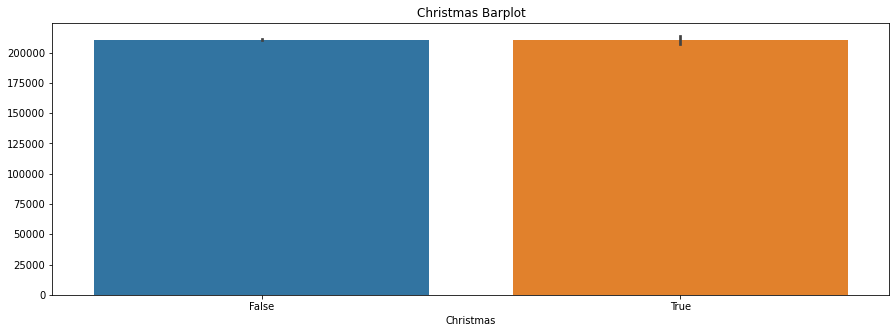

count     421570
unique         2
top        False
freq      415624
Name: Christmas, dtype: object


In [35]:
eda. barplot('Christmas')

#### Bivariate Analysis

In [64]:
#A class that performs bivariate analysis
class BivariateAanalysis(object):
    def __init__(self, data):
           self.data = data
           
    def scatterplot(self, x_col, y_col):
        plt.figure(figsize=(15, 5))
        sns.scatterplot(data=self.data, x=x_col, y=y_col)
        plt.title(f"{x_col} vs {y_col}")
        plt.show()

    def regplot (self, x_col, y_col):
        plt.figure(figsize=(15, 5))
        sns.regplot(data=self.data, x=x_col, y=y_col)
        plt.title(f"{x_col} vs {y_col}")
        plt.show()

    def boxplots(self, x_col, y_col):
        plt.figure(figsize=(15, 5))
        sns.boxplot(data=self.data, x=x_col, y=y_col)
        plt.title(f"{x_col} vs {y_col}")
        plt.show()

    def barplots(self, x_col, y_col):
        plt.figure(figsize=(15, 5))
        sns.barplot(data=self.data, x=x_col, y=y_col)
        plt.title(f"{x_col} vs {y_col}")
        plt.show()

In [65]:
#instantiating
biveda=BivariateAanalysis(merged_df)

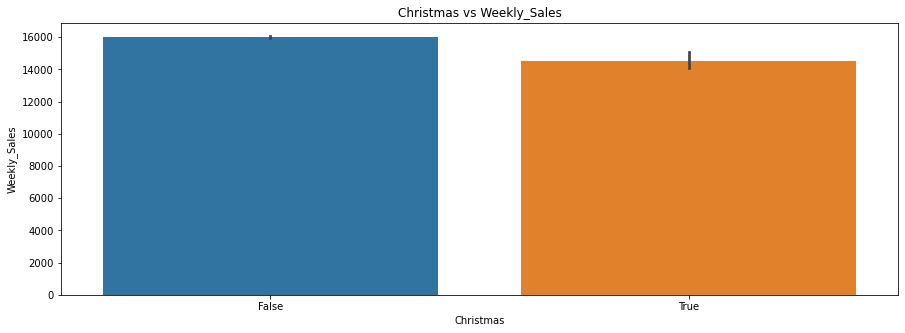

In [66]:
# Christmas holiday vs not-Christmas
biveda.barplots('Christmas', 'Weekly_Sales')

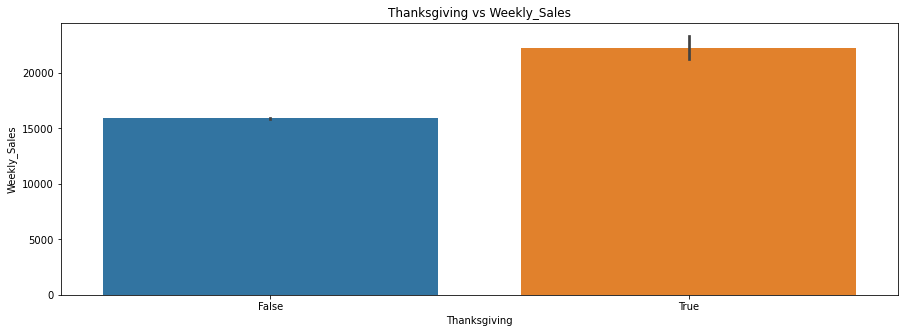

In [67]:
#Thanksgiving holiday vs not-thanksgiving
biveda.barplots('Thanksgiving', 'Weekly_Sales')

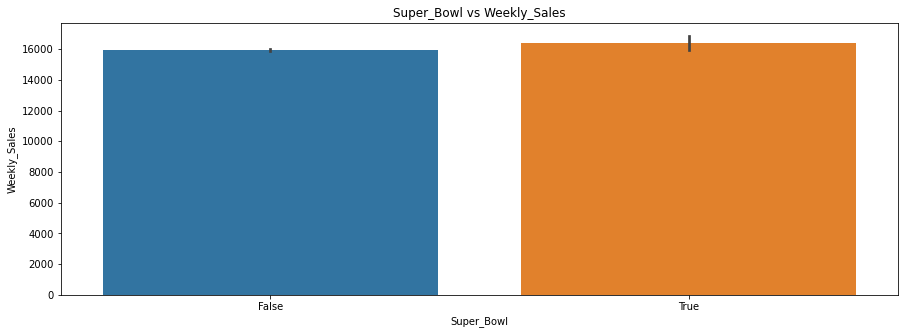

In [40]:
# Super bowl holiday vs not-super bowl
biveda.barplots('Super_Bowl', 'Weekly_Sales')

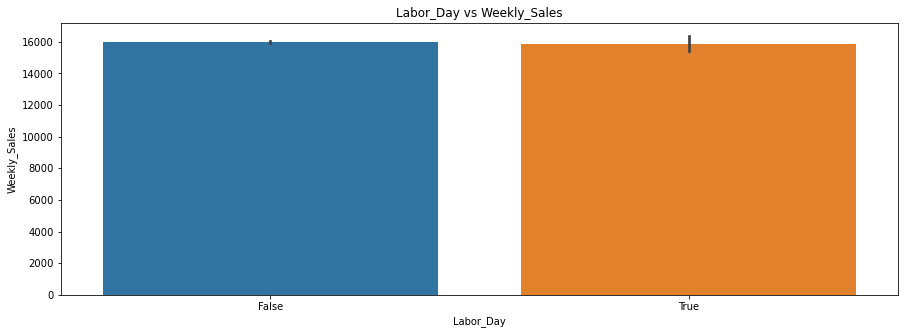

In [41]:
# Labor day holiday vs not-labor day
biveda.barplots('Labor_Day', 'Weekly_Sales')

It is shown that for the graphs, Labor Day and Christmas do not increase weekly average sales. There is positive effect on sales in Super bowl, but the highest difference is in the Thanksgiving. I think, people generally prefer to buy Christmas gifts 1-2 weeks before Christmas, so it does not change sales in the Christmas week. And, there is Black Friday sales in the Thanksgiving week.

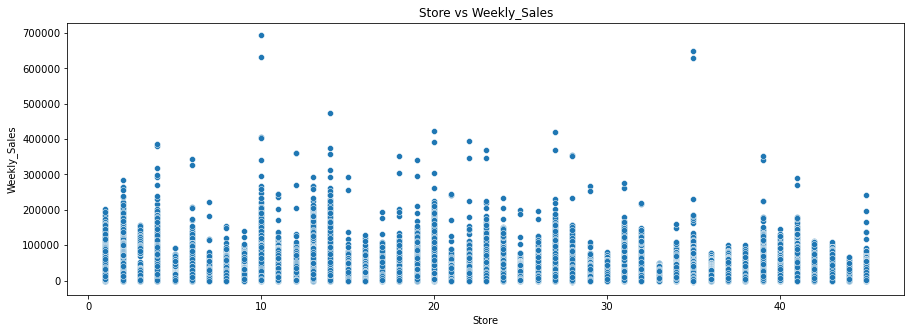

In [42]:
biveda.scatterplot('Store', 'Weekly_Sales')

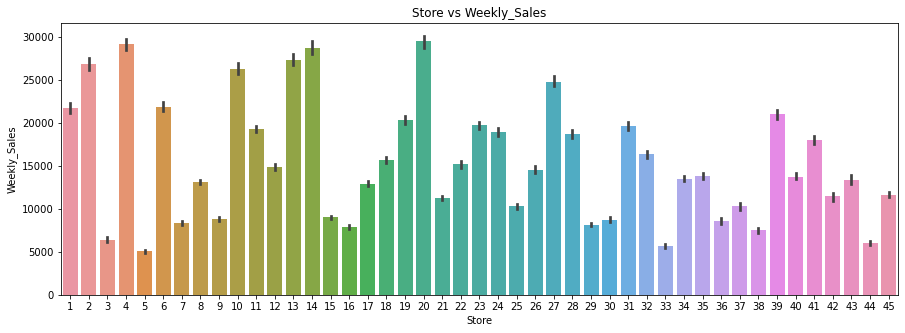

In [43]:
biveda.barplots('Store', 'Weekly_Sales')

Some stores has higher sales but on average store 20 is the best and 4 and 14 following it.

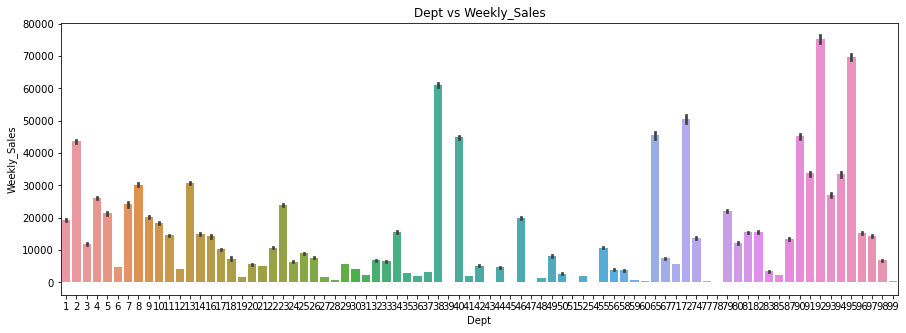

In [44]:
biveda.barplots('Dept', 'Weekly_Sales')

92 is higher.

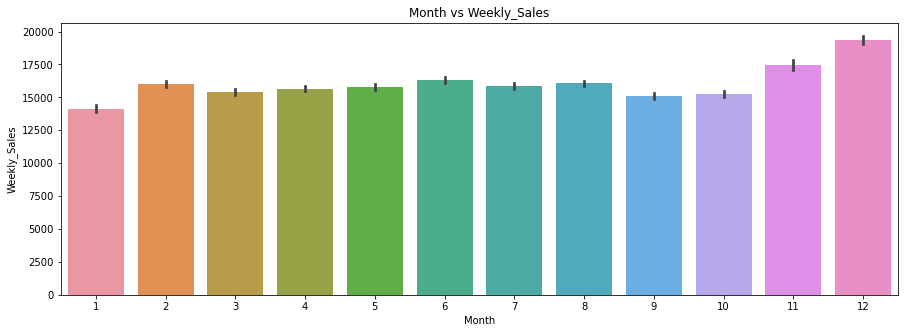

In [45]:
eda.barplots('Month', 'Weekly_Sales')

The best sales are in December and November, as expected

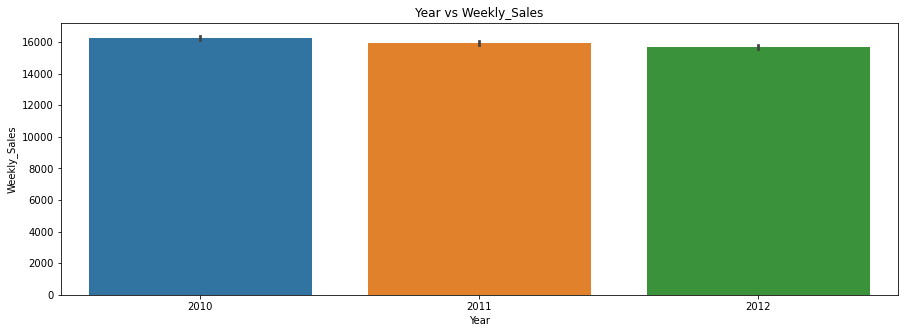

In [46]:
biveda.barplots('Year', 'Weekly_Sales')

2010 has the highest sales, followed by 2011 then 2012

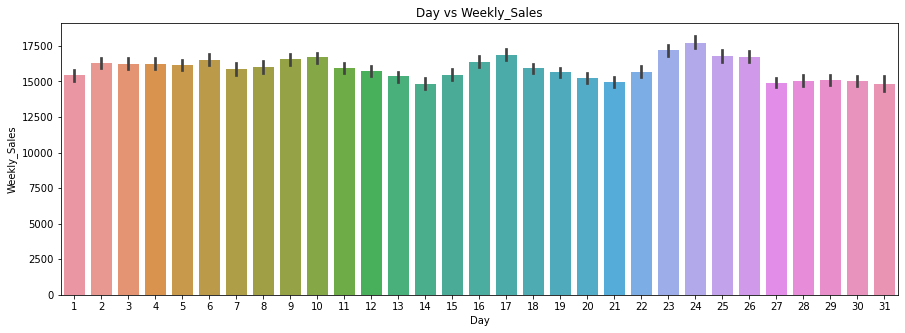

In [69]:
biveda.barplots('Day', 'Weekly_Sales')

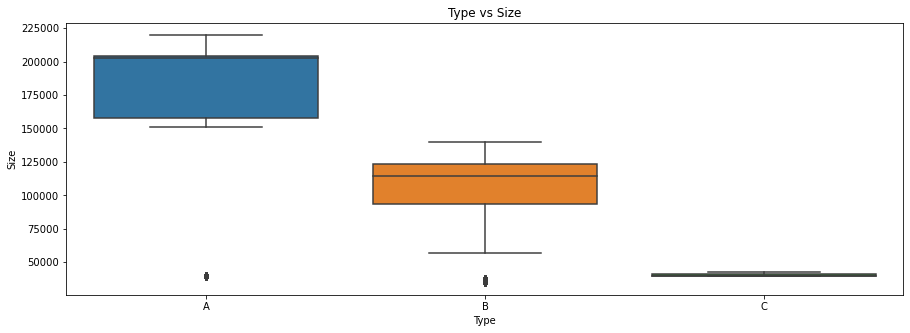

In [68]:
biveda.boxplots('Type', 'Size')

#### Multivariate Analysis

In [48]:
class MultivariateAnalysis(object):
    def __init__(self, data):
        self.data = data
        
    def pairplot(self, cols, hue=None):
        plt.figure(figsize=(15, 5))
        sns.pairplot(data=self.data[cols], hue=hue)
        plt.title(f"{', '.join(cols)} Pairplot")
        plt.show()
    def barplots(self, cols, hue=None):
        plt.figure(figsize=(15, 5))
        sns.barplot(data=self.data[cols], hue=hue)
        plt.title(f"{', '.join(cols)} Barplot")
        plt.show()
    def heatmap(self, cols, hue=None):
        plt.figure(figsize=(15, 5))
        sns.heatmap(data=self.data[cols].corr(), cmap="coolwarm", annot=True)
        plt.title(f"{', '.join(cols)} Correlation Heatmap")
        plt.show()

In [56]:
class MultivariateAnalysis(object):
    def __init__(self, data):
        self.data = data
    
    def pairplot(self, cols, hue=None):
        plt.figure(figsize=(15, 5))
        sns.pairplot(data=self.data[cols], hue=hue)
        plt.title(f"{', '.join(cols)} Pairplot")
        plt.show()
        
    def barplots(self, cols, hue=None):
        plt.figure(figsize=(15, 5))
        sns.barplot(data=self.data[cols], hue=hue)
        plt.title(f"{', '.join(cols)} Barplot")
        plt.show()
        
    def heatmap(self, cols, hue=None):
        plt.figure(figsize=(15, 15))
        sns.heatmap(data=self.data[cols].corr(), annot=True)
        plt.title(f"{', '.join(cols)} Correlation Heatmap")
        plt.show()
        
    def boxplot(self, cols, hue=None):
        plt.figure(figsize=(15, 5))
        sns.boxplot(data=self.data[cols], hue=hue)
        plt.title(f"{', '.join(cols)} Boxplot")
        plt.show()


In [57]:
# Create an instance of the MultivariateAnalysis class
multieda = MultivariateAnalysis(merged_df)

<ipython-input-56-29d27ea434df>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=self.data[cols].corr(), annot=True)


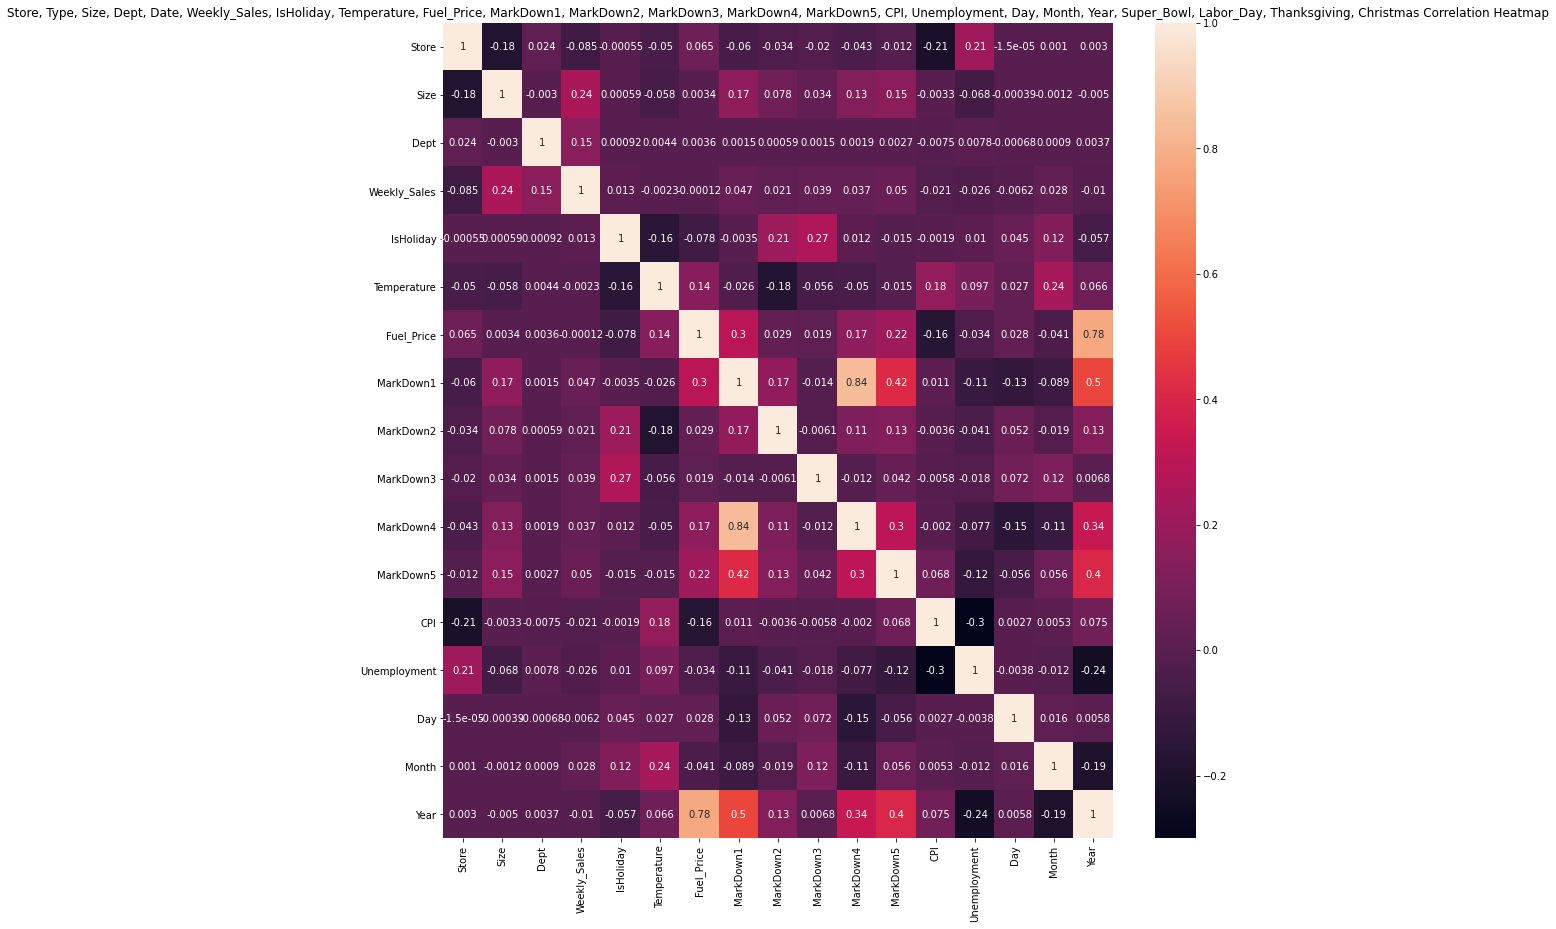

In [58]:
multieda.heatmap(['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Day', 'Month', 'Year',
       'Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas' ])

As expected, holiday average sales are higher than normal dates.

Christmas holiday introduces as the last days of the year. But people generally shop at 51th week. So, when we look at the total sales of holidays, Thankgiving has higher sales between them which was assigned by Walmart.

Year 2010 has higher sales than 2011 and 2012. But, November and December sales are not in the data for 2012. Even without highest sale months, 2012 is not significantly less than 2010, so after adding last two months, it can be first.

It is obviously seen that week 51 and 47 have higher values and 50-48 weeks follow them. Interestingly, 5th top sales belongs to 22th week of the year. This results show that Christmas, Thankgiving and Black Friday are very important than other weeks for sales and 5th important time is 22th week of the year and it is end of the May, when schools are closed. Most probably, people are preparing for holiday at the end of the May.

January sales are significantly less than other months. This is the result of November and December high sales. After two high sales month, people prefer to pay less on January.

CPI, temperature, unemployment rate and fuel price have no pattern on weekly sales.

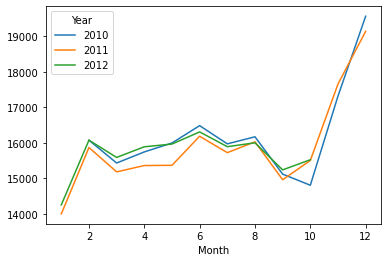

In [72]:
pivot_table = pd.pivot_table(data=merged_df, values='Weekly_Sales', index='Month', columns='Year')
pivot_table.plot();

2011 has lower sales than 2012 generally, but 2012 has no information about November and December which have higher sales

## Modelling
